# IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')

# PROBLEM STATEMENT

A company has a dataset of customer order payments, containing information on the payment sequence, type of payment, number of payment installments, and payment value. The company wants to analyze this data to gain insights into customer behavior and preferences in terms of payment.

To achieve this, the company plans to use clustering techniques to group similar payment patterns together. Specifically, they will use the features of payment sequential, payment type, payment installments, and payment value to create customer clusters.

The objective of this analysis is to identify distinct groups of customers based on their payment behavior, which could potentially be used to inform targeted marketing strategies or improve the company's payment processes.

Therefore, the goal of this project is to perform clustering on the order payment dataset, using the specified features, and to interpret the resulting customer segments to gain actionable insights.

# DATA LOADING

In [3]:
df = pd.read_csv('/Users/iqbaljanitra/Documents/technical test/Perqara/data/order_payments_dataset.csv')

In [4]:
df.shape

(103886, 5)

Showing first 10 rows

In [5]:
df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


showing last 10 rows

In [6]:
df.tail(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
103876,0872d0faafe0cb56e6f2c594cca1522c,1,credit_card,2,127.92
103877,3531718b24dfd5022fb0d101e10e33b9,1,credit_card,1,194.11
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


In [7]:
df.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


# DATA CLEANING

### CHECKING MISSING VALUE

In [9]:
df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### CHECKING DUPLICATE DATA

In [10]:
df.duplicated().value_counts()

False    103886
dtype: int64

### DROPING order_ID COLOUMN

In [11]:
df.drop('order_id', axis=1, inplace=True)

# EXPLORATORY DATA ANALYS

Based on the summary statistics you provided, we can see the following information about the features payment_sequential, payment_installments, and payment_value

In [12]:
df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### PAYMENT TYPE

The code snippet you provided uses the pandas library to get the count of each unique value in the 'payment_type' column of a dataframe, The most common payment type in the dataset is credit card, which accounts for around 77% of all payments. Boleto is the second most common payment type, accounting for around 20% of all payments, followed by voucher (around 6%) and debit card (around 2%). There are only three payments in the 'not_defined' category, which likely represent missing or invalid data.

This information could be used to gain insights into the payment behavior of customers in the dataset, and to inform targeted marketing strategies or improvements to the payment process. For example, if most customers are using credit card to make payments, the company may want to consider offering credit card-specific rewards or promotions to incentivize more frequent use of this payment type.

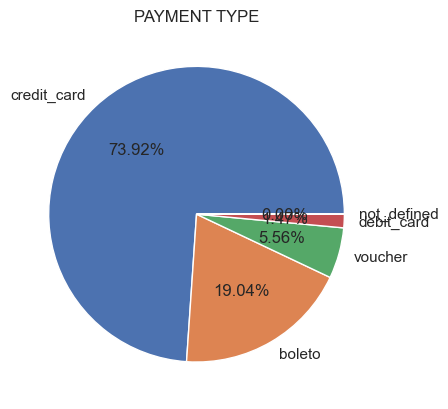

In [13]:
payment = df['payment_type'].value_counts()
sns.set_theme(style="darkgrid")
sns.set_theme()
plt.pie(payment, autopct='%.2f%%', labels=payment.index)
plt.title('PAYMENT TYPE')
plt.show()

In [14]:
df['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

Based on barplot it showing payments installments mostly using credit card

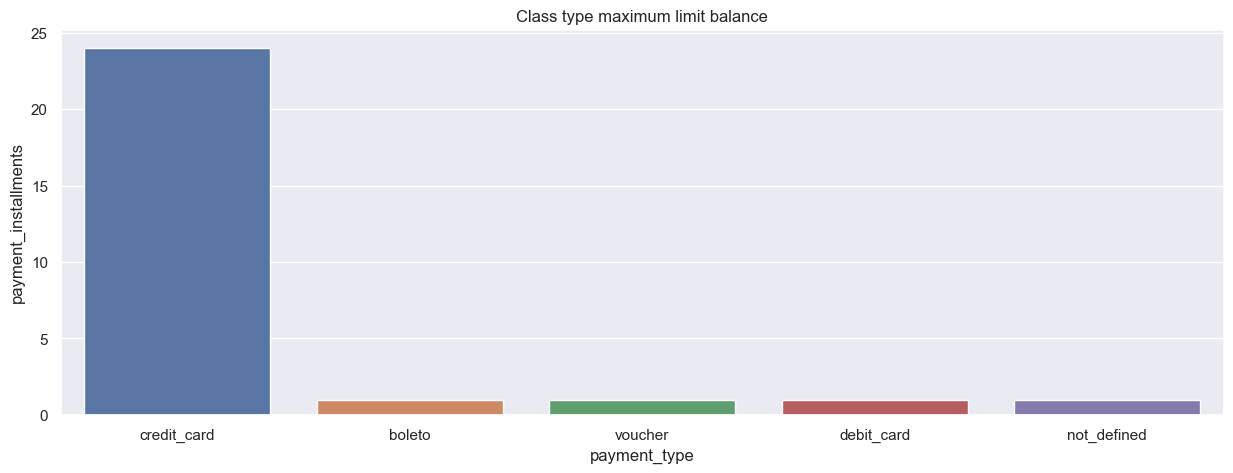

In [15]:
plt.figure(figsize=(15, 5))
sns.barplot(x='payment_type', y='payment_installments', data=df, estimator=max)
plt.title('Class type maximum limit balance')
plt.xlabel('payment_type')
plt.ylabel('payment_installments')
plt.show()

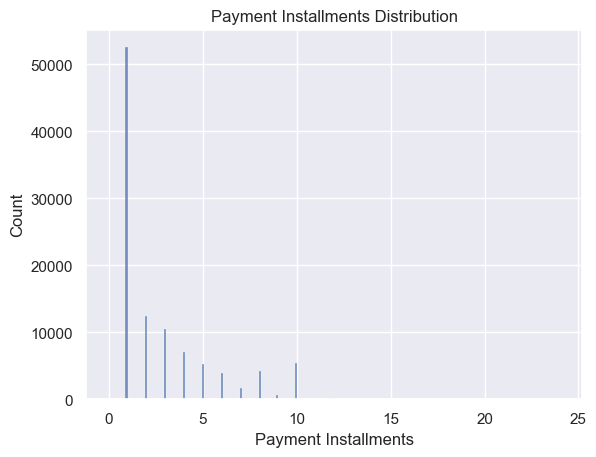

In [16]:
sns.histplot(df['payment_installments'])
plt.title('Payment Installments Distribution')
plt.xlabel('Payment Installments')
plt.ylabel('Count')
plt.show()


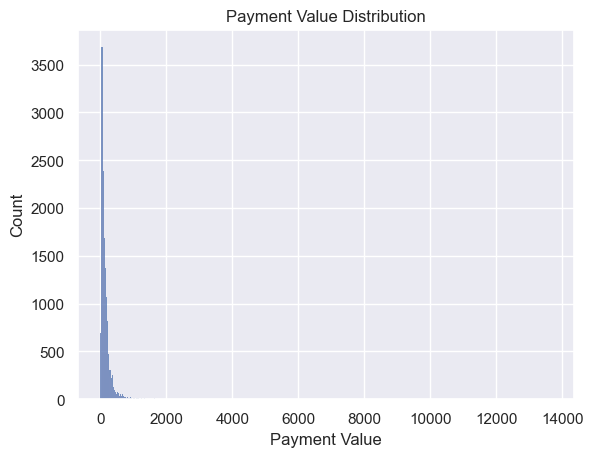

In [17]:
sns.histplot(df['payment_value'])
plt.title('Payment Value Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Count')
plt.show()


 a bar plot where the x-axis represents the payment type and the y-axis represents the average payment value for that type. the percentages provided for the payment types and their corresponding payment values, it appears that the payment types debit_card, boleto, and voucher have significantly higher payment values compared to the credit_card payment type. This suggests that customers who use these payment types tend to make larger purchases compared to customers who use credit_card.

This information could be useful in identifying different customer segments based on their payment behavior. For example, if the clustering analysis reveals distinct clusters based on payment behavior, we could potentially use this information to target different customer segments with tailored marketing campaigns or promotions.



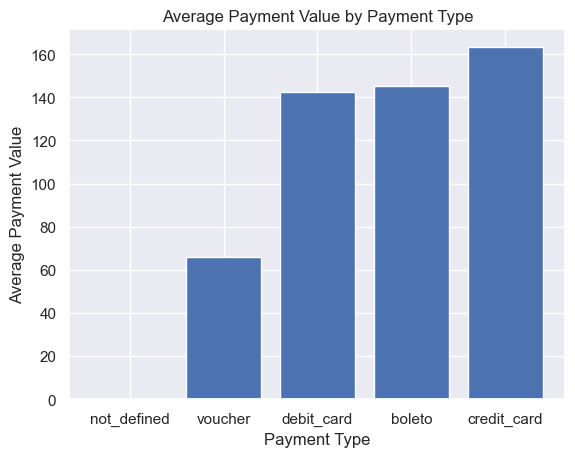

In [18]:
payment_type_avg = df.groupby('payment_type')['payment_value'].mean().sort_values()
plt.bar(payment_type_avg.index, payment_type_avg)
plt.title('Average Payment Value by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Payment Value')
plt.show()


In [19]:
df.groupby('payment_type')['payment_value'].mean().sort_values()

payment_type
not_defined      0.000000
voucher         65.703354
debit_card     142.570170
boleto         145.034435
credit_card    163.319021
Name: payment_value, dtype: float64

In [24]:
df.groupby('payment_installments')['payment_value'].mean().sort_values()

payment_installments
0      94.315000
1     112.420229
11    124.932174
2     127.228150
3     142.539317
13    150.462500
4     163.976840
14    167.962667
17    174.602500
5     183.465222
7     187.673672
9     203.440870
6     209.849952
22    228.710000
23    236.480000
21    243.700000
16    292.694000
8     307.737427
12    321.678496
10    415.085837
15    445.553108
18    486.483333
24    610.048889
20    615.801765
Name: payment_value, dtype: float64

the mean payment value for payments made in 1 installment is 112.42, while the mean payment value for payments made in 20 installments is 615.80. The values are sorted in ascending order, so the payment value for payments made in 0 installments is the lowest at 94.31.

This output provides insight into the relationship between the number of payment installments and the payment value. We can see that the average payment value tends to increase as the number of payment installments increases, with some exceptions.




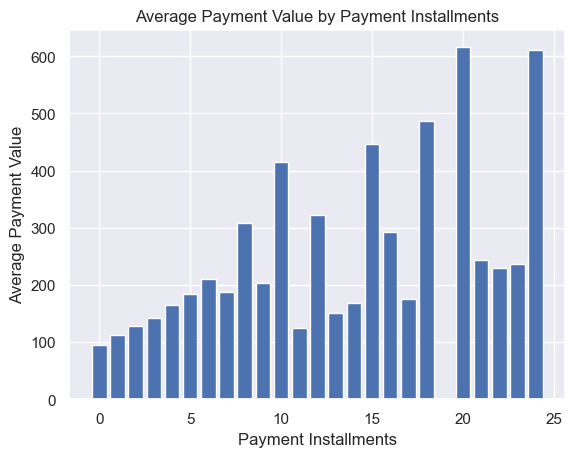

In [26]:
payment_type_avg = df.groupby('payment_installments')['payment_value'].mean().sort_values()
plt.bar(payment_type_avg.index, payment_type_avg)
plt.title('Average Payment Value by Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('Average Payment Value')
plt.show()

# PREPROCESSING

The OrdinalEncoder is used to transform the categorical feature payment_type into ordinal values, which can be used as input to a clustering algorithm. and put it into a pipeline

In [ ]:
cat_1_pipeline = Pipeline([
        ('encoder', OneHotEncoder())
    ],
    )

cat_1_tr = cat_1_pipeline.fit_transform(df[['payment_type']])
cat_1_tr

<103886x5 sparse matrix of type '<class 'numpy.float64'>'
	with 103886 stored elements in Compressed Sparse Row format>

The OrdinalEncoder is used to transform the categorical features payment_sequential and payment_installments into ordinal values, which can be used as input to a clustering algorithm.

In [ ]:
cat_2_pipeline = Pipeline([
        ('encoder2', OrdinalEncoder())

    ])

cat_2_tr = cat_2_pipeline.fit_transform(df[['payment_sequential', 'payment_installments']])
cat_2_tr

array([[0., 8.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 5.],
       [0., 1.]])

The MinMaxScaler is used to transform the continuous feature payment_value into a scaled range between 0 and 1, which can be used as input to a clustering algorithm.

In [ ]:
cat_3_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

cat_3_tr = cat_3_pipeline.fit_transform(df[['payment_value']])
cat_3_tr

array([[0.00726942],
       [0.00178497],
       [0.00480896],
       ...,
       [0.00349603],
       [0.02704463],
       [0.0140207 ]])

this code represents a typical data preprocessing pipeline for clustering. By using the ColumnTransformer, we can apply different preprocessing steps to different subsets of the data, making it easy to handle both categorical and continuous features in the same pipeline. The resulting transformed data can then be used as input to a clustering algorithm.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', cat_1_pipeline, ['payment_type']),
        ('encoder2', cat_2_pipeline, ['payment_sequential', 'payment_installments']),
        ('scaler', cat_3_pipeline, ['payment_value']),

    ])

df_transformed = preprocessor.fit_transform(df)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('encoder',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['payment_type']),
                                ('encoder2',
                                 Pipeline(steps=[('encoder2',
                                                  OrdinalEncoder())]),
                                 ['payment_sequential',
                                  'payment_installments']),
                                ('scaler',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['payment_value'])])

In [ ]:
df_transformed

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.00000000e+00, 7.26942465e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.78497198e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 4.80895896e-03],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 3.49602754e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e+00, 2.70446309e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.40207025e-02]])

# MODEL

The K values are defined as [2,3,5,7,9,10,12], and for each value, the KMeans model is trained on the transformed data (after preprocessing with encoding and scaling) to obtain the inertia value. The results are plotted as a line graph with K values on the x-axis and inertia values on the y-axis.

The code also calculates the index of the elbow point by finding the inertia value closest to the halfway point between the maximum and minimum inertia values. The plot is annotated with a red arrow pointing to the elbow point to indicate the optimal number of clusters.

Based on the elbow method plot, the optimal number of clusters for the order payment dataset is not clear, as there is no clear elbow point. The inertia values seem to increase gradually as the number of clusters increases, without any significant change in slope. Therefore, we may need to consider other methods or criteria, such as silhouette score or gap statistic, to determine the optimal number of clusters. and it's unlikely that the elbow point is around 100000.



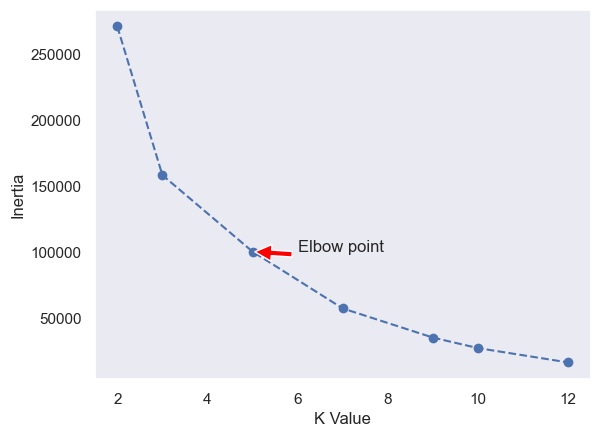

In [ ]:
K=[2,3,5,7,9,10,12]
inertia=[KMeans(n_clusters=i).fit(df_transformed).inertia_ for i in K]
plt.plot(K,inertia,'o--')
plt.xlabel('K Value')
plt.ylabel('Inertia')
plt.grid()
elbow_index = inertia.index(min(inertia, key=lambda x: abs(x - (max(inertia)-min(inertia))/2)))
plt.annotate("Elbow point", xy=(K[elbow_index], inertia[elbow_index]), xytext=(K[elbow_index]+1, inertia[elbow_index]-0.02),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

now lets make plot_silhouette function takes in a clustering model, a range of cluster numbers to try, the dataset X, and the name of the model as inputs. It then iterates through each cluster number and creates a subplot with two plots. The function prints the average silhouette coefficient for each cluster number.

In [ ]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
def plot_silhouette(model,range_n_clusters,X,model_name):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = model(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')


        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle((f"Silhouette analysis for {model_name} clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

The silhouette plot shows how well-defined the clusters are and how well-separated they are from each other. The average silhouette score gives an overall indication of the quality of the clustering. The silhouette analysis for KMeans clustering on the given data shows that the optimal number of clusters is 12, as it has the highest silhouette score of 0.88. However, the silhouette scores for the other numbers of clusters are also relatively high, indicating that the data can be clustered well 

For n_clusters = 2 The average silhouette_score is : 0.6832831945266364
For n_clusters = 3 The average silhouette_score is : 0.6112834207247906
For n_clusters = 5 The average silhouette_score is : 0.583422222491173
For n_clusters = 7 The average silhouette_score is : 0.662938177403356
For n_clusters = 9 The average silhouette_score is : 0.8097591813971428
For n_clusters = 10 The average silhouette_score is : 0.8090199831323114
For n_clusters = 12 The average silhouette_score is : 0.8765192622410263


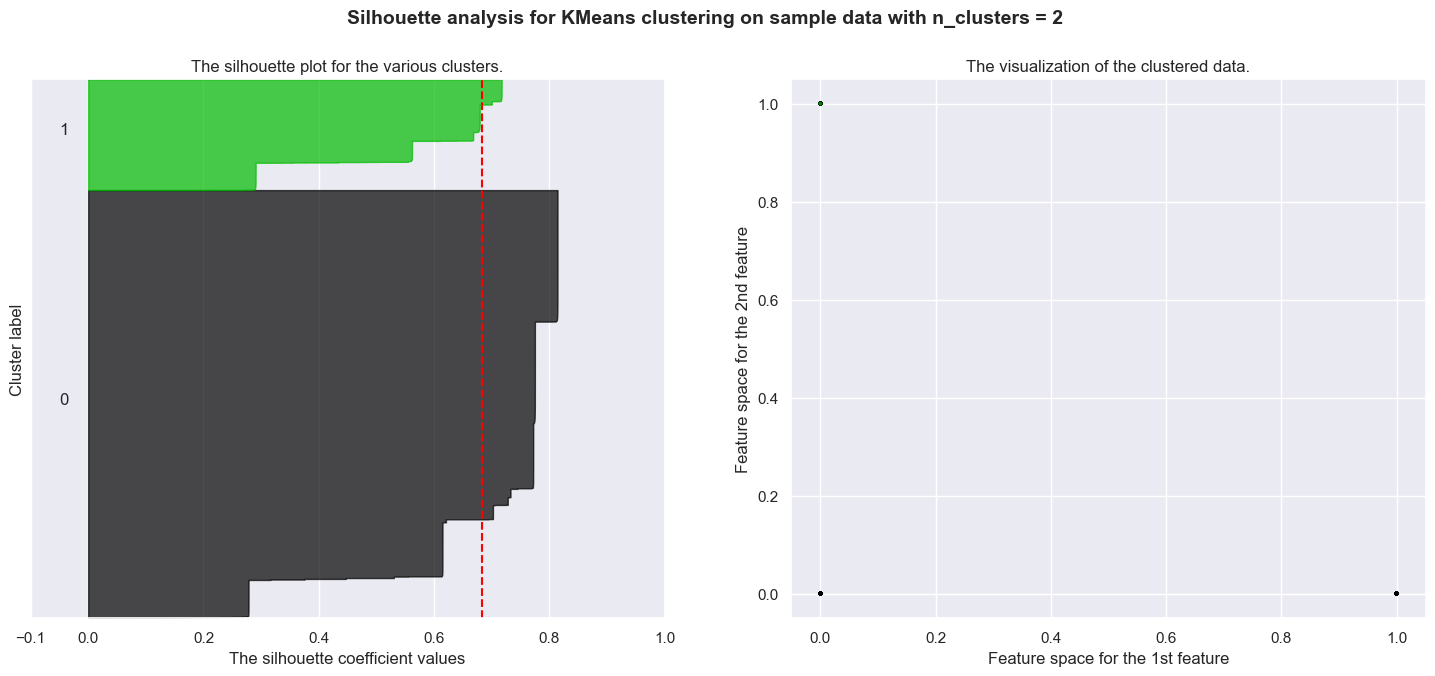

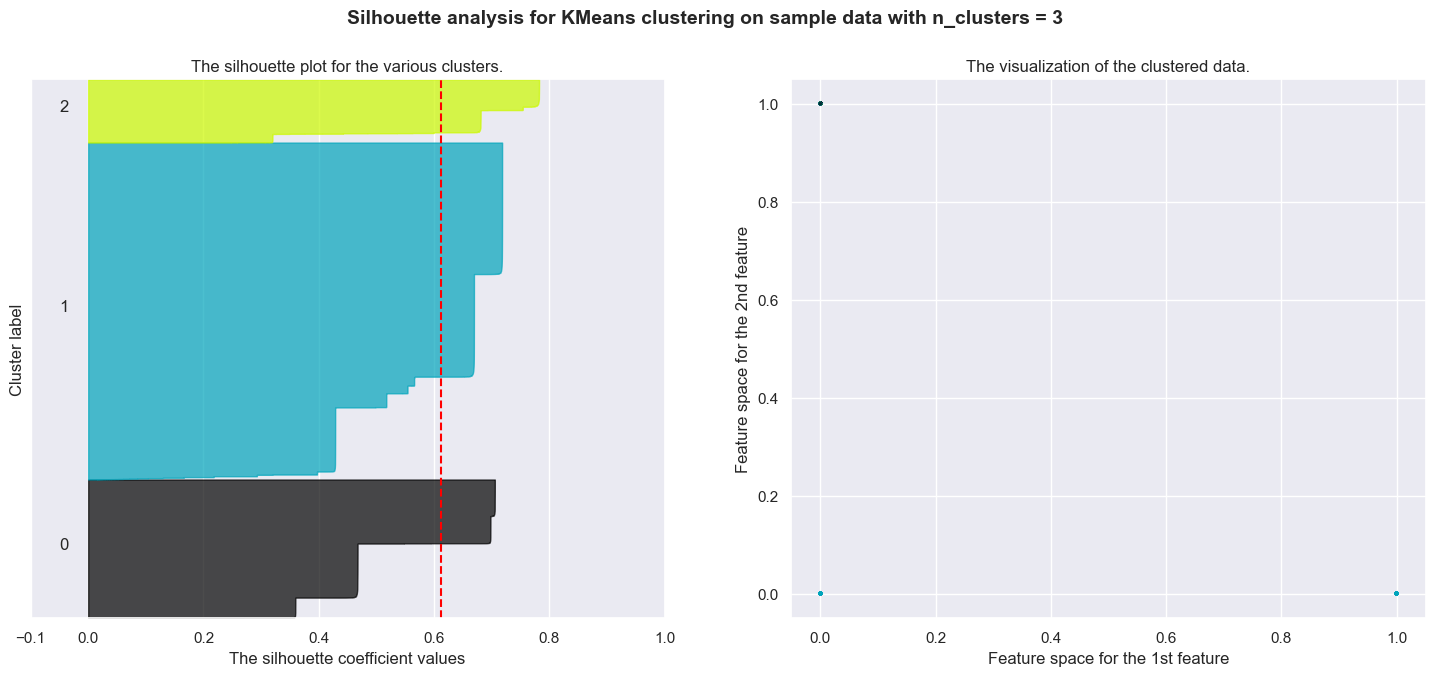

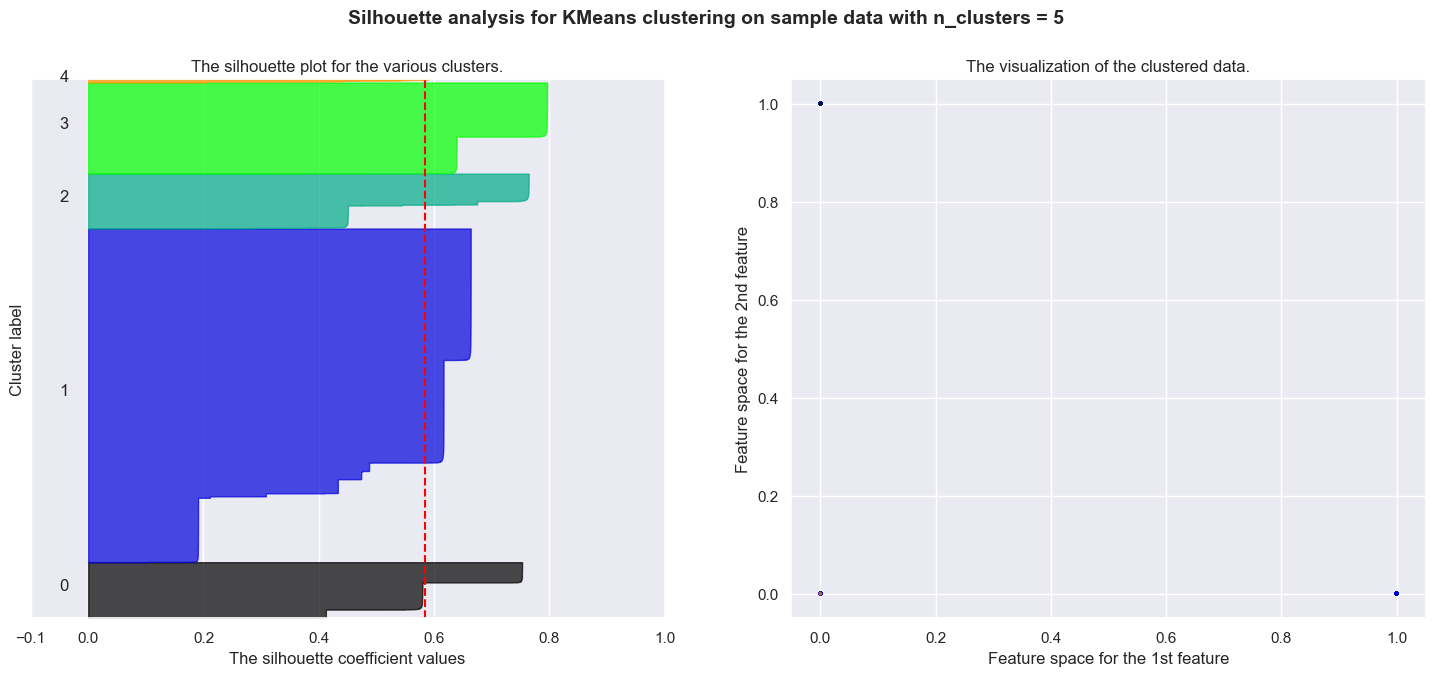

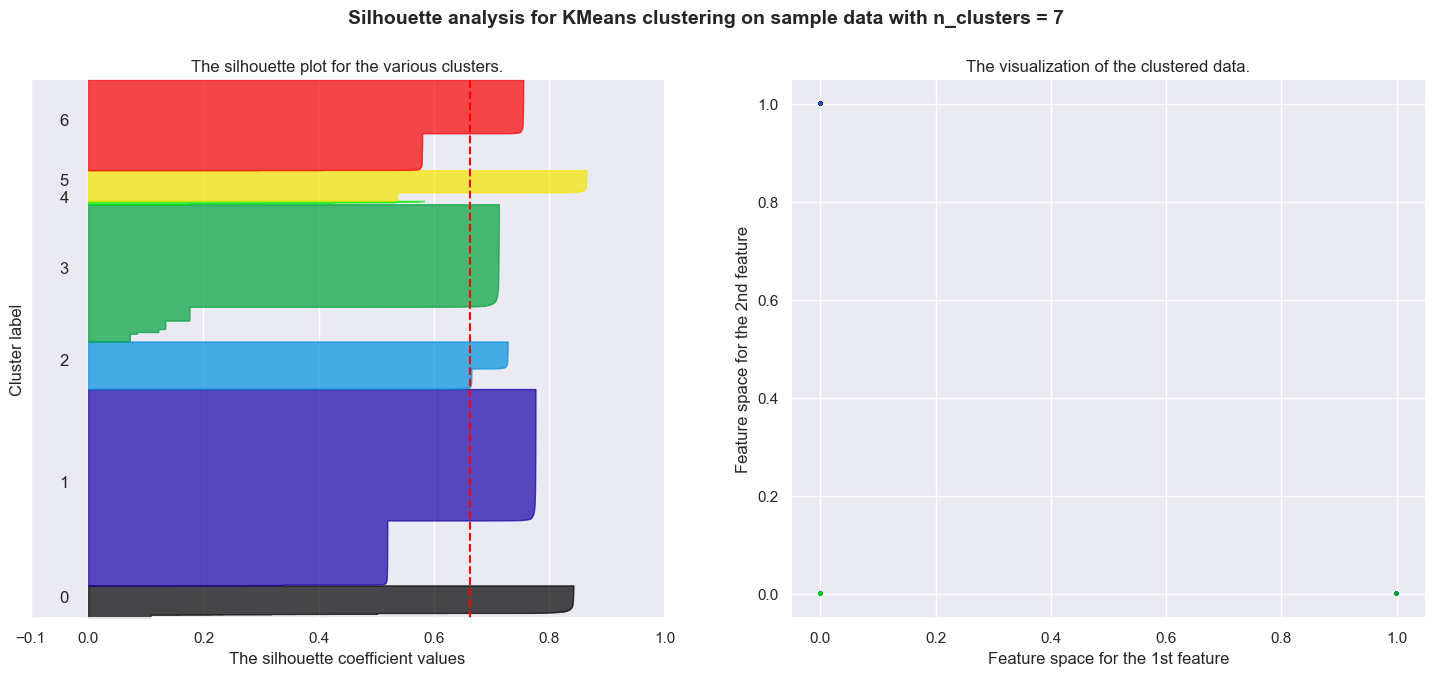

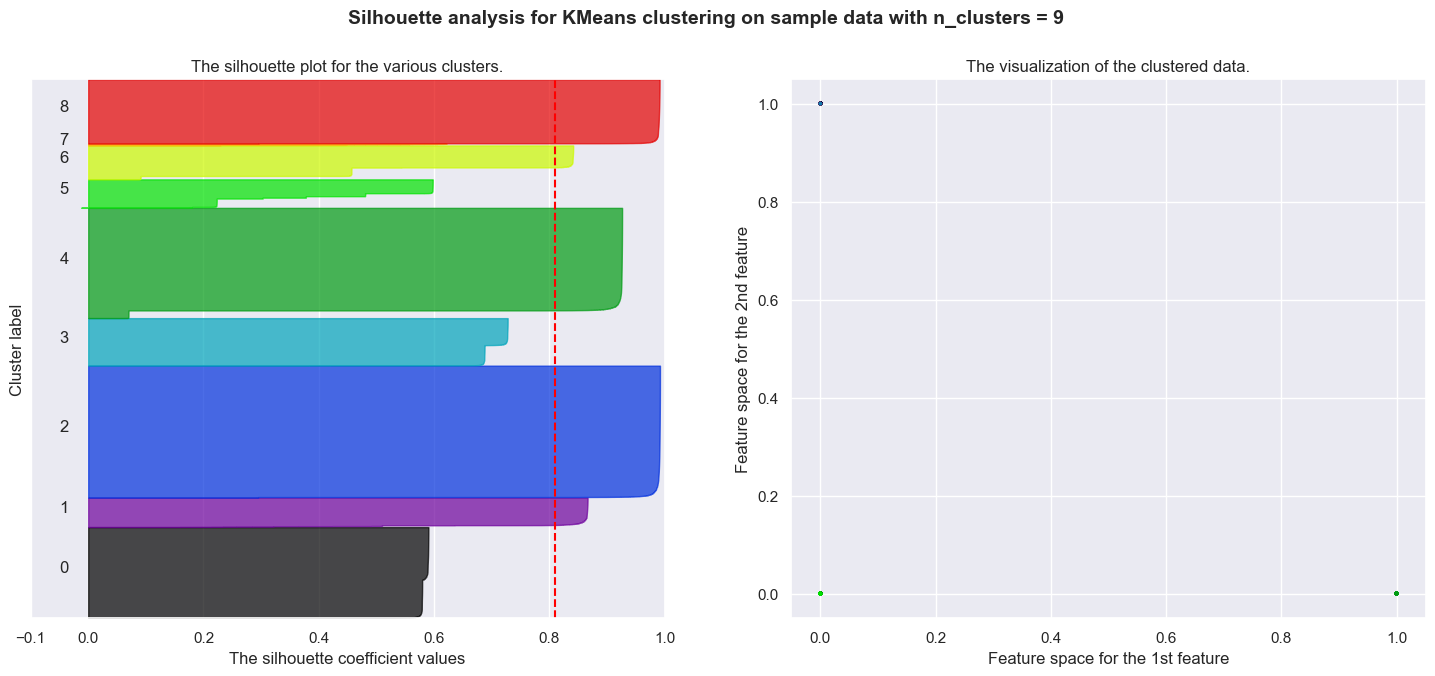

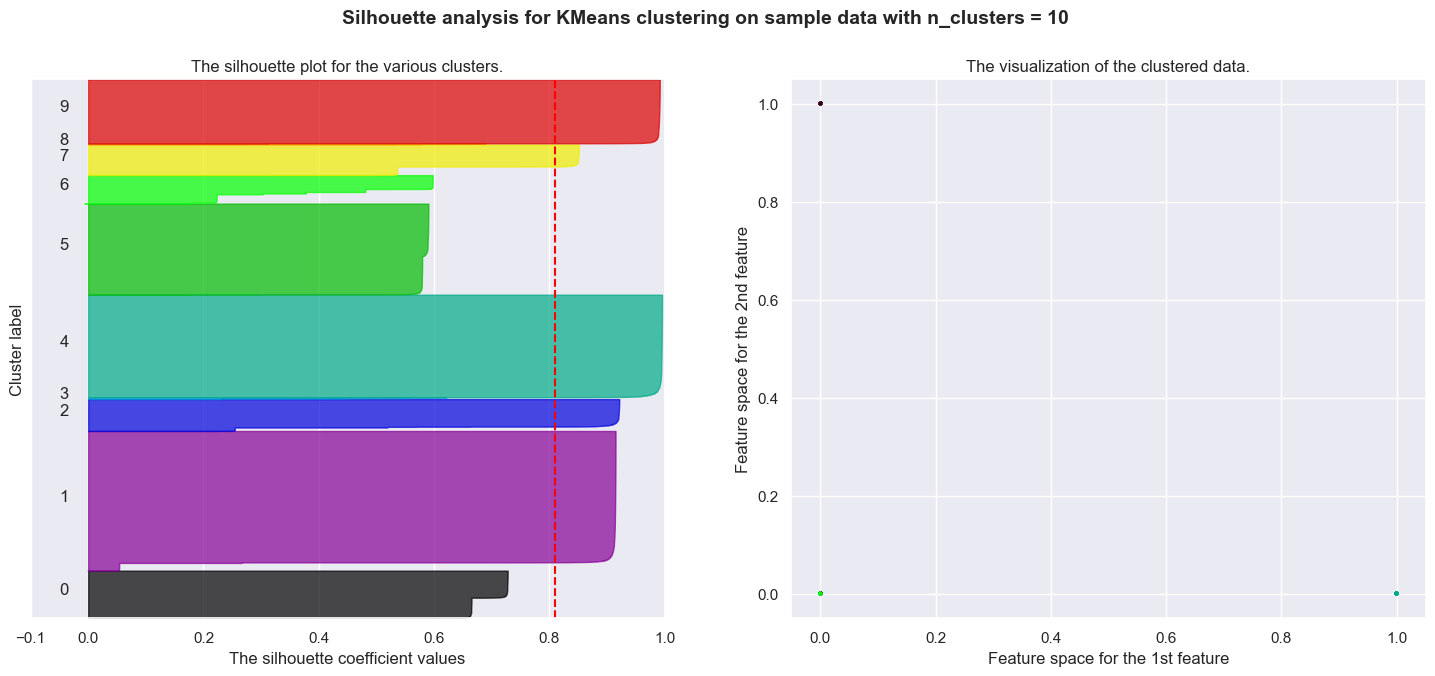

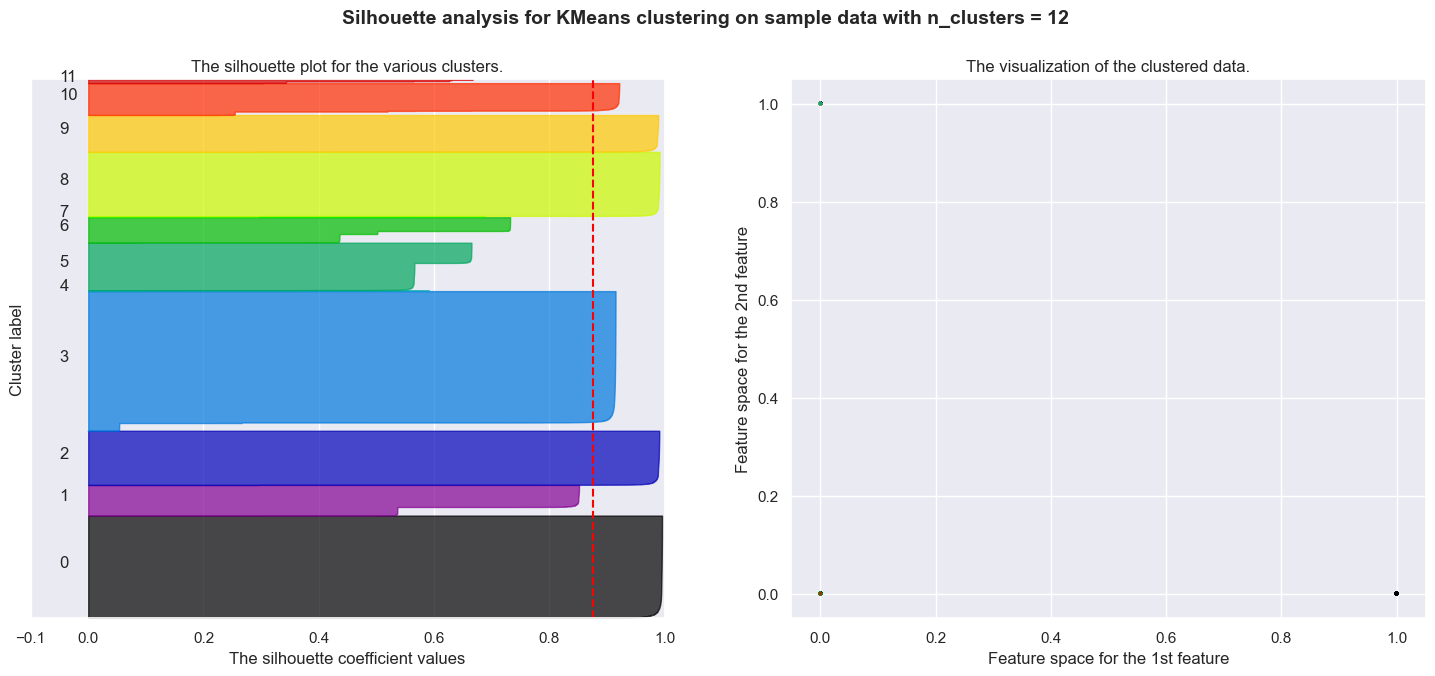

In [ ]:
plot_silhouette(KMeans,K,df_transformed ,'KMeans')

In [ ]:
kmean_12 =  KMeans(n_clusters=12)

combine them using a Pipeline object and fit the pipeline on the original dataframe df. The Pipeline will first apply the preprocessor to transform the data, and then apply the clustering algorithm kmean_12 to cluster the transformed data.

In [ ]:
df_clustering = df
all_process = Pipeline([
    ("preprocess", preprocessor),
    ("clustering", kmean_12)
])
all_process.fit(df_clustering)
df_clustering['Clustering'] =kmean_12.labels_

In [ ]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['payment_type']),
                                                 ('encoder2',
                                                  Pipeline(steps=[('encoder2',
                                                                   OrdinalEncoder())]),
                                                  ['payment_sequential',
                                                   'payment_installments']),
                                                 ('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['payment_value'])])),
                ('clustering', KMeans(n_clusters=12))])

the Clustering column and then calculate the mean of the columns payment_sequential, payment_type, payment_installments, and payment_value for each group. The resulting DataFrame will have one row per group (i.e., each of the 12 clusters) and the mean values for each of the columns.

In [ ]:
df_clustering

,payment_sequential,payment_type,payment_installments,payment_value,Clustering
0,1,credit_card,8,99.33,9
1,1,credit_card,1,24.39,5
2,1,credit_card,1,65.71,5
3,1,credit_card,8,107.78,9
4,1,credit_card,2,128.45,0
...,...,...,...,...,...
103881,1,boleto,1,363.31,3
103882,1,credit_card,2,96.80,0
103883,1,credit_card,1,47.77,5
103884,1,credit_card,5,369.54,2


# OVERALL CONCLUSION

In this analysis, we used customer transaction data from an e-commerce platform in Brazil to identify customer segments and their purchase patterns. We began load data, data cleaning, exploratory data anayls, preprocessing the data and clustering modeling

We then used the K-means clustering algorithm to group customers based on their purchasing behavior. To determine the optimal number of clusters, we used the elbow method and silhouette scores. The results indicated that 12 clusters were the most appropriate for our data.

We analyzed the purchase patterns of each cluster and found that they differed significantly in terms of their payment methods, payment installments, and payment values. These insights can be useful in developing targeted marketing campaigns and improving customer retention.

Overall, this analysis demonstrates the value of using machine learning techniques to segment customer data and identify patterns in customer behavior. By understanding customer segments, businesses can tailor their marketing efforts and provide a better customer experience, leading to increased revenue and customer loyalty.